d:\Anaconda_exe\Anaconda\envs\abaqus_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27850 (\N{CJK UNIFIED IDEOGRAPH-6CCA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda_exe\Anaconda\envs\abaqus_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26494 (\N{CJK UNIFIED IDEOGRAPH-677E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda_exe\Anaconda\envs\abaqus_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda_exe\Anaconda\envs\abaqus_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38543 (\N{CJK UNIFIED IDEOGRAPH-968F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda_exe\Anaconda\envs\abaqus_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26041 (\N{CJK UNIF

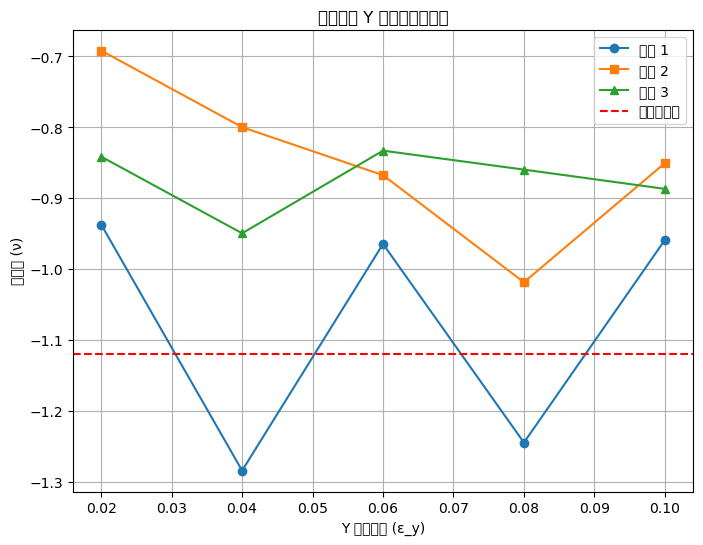

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# y 方向的应变（x 轴数据）
strain_y = np.array([0.02, 0.04, 0.06, 0.08, 0.1])

# 三组实验的泊松比（y 轴数据）
values1 = np.array([-0.937156862745098, -1.2841148053424267, -0.9644839067702552, -1.2446035805626596, -0.9589512083903329])
values2 = np.array([-0.6917688842119111, -0.7997709539859503, -0.86749233938139862, -1.018507645441183, -0.850459385196634])
values3 = np.array([-0.8413576367064739, -0.94946199232637265, -0.8329150212880144, -0.8596482091131363, -0.8867682437850841])

# 理论泊松比
target = -1.12

# 创建图形
plt.figure(figsize=(8, 6))

# 绘制三次实验的泊松比曲线
plt.plot(strain_y, values1, 'o-', label='实验 1')
plt.plot(strain_y, values2, 's-', label='实验 2')
plt.plot(strain_y, values3, '^-', label='实验 3')

# 绘制理论泊松比的水平线
plt.axhline(y=target, color='r', linestyle='--', label='理论泊松比')

# 添加图例
plt.legend()

# 设置标题和轴标签
plt.title('泊松比随 Y 方向应变的变化')
plt.xlabel('Y 方向应变 (ε_y)')
plt.ylabel('泊松比 (ν)')

# 显示网格
plt.grid(True)

# 显示图形
plt.show()

Index 0 平均弹性斜率: 73.67 N/mm
Index 4 平均弹性斜率: 333.14 N/mm
Index 14 平均弹性斜率: 258.21 N/mm
Index 21 平均弹性斜率: 153.66 N/mm


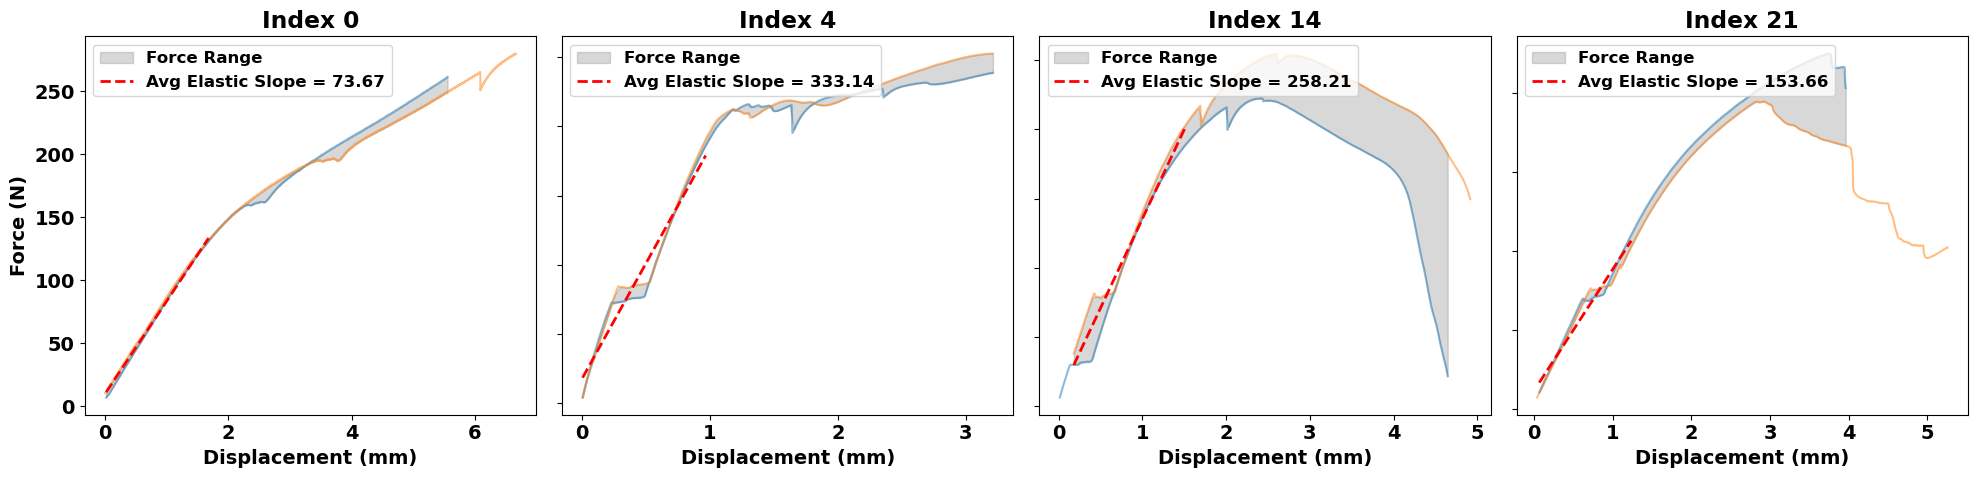

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 全局字体设置
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['legend.fontsize'] = 12

def process_and_plot_force_displacement(directory):
    index_data = {}
    
    for filename in os.listdir(directory):
        if filename.endswith('.txt') and filename.startswith('index_'):
            parts = filename.split('_')
            index = int(parts[1])
            
            filepath = os.path.join(directory, filename)
            data = np.loadtxt(filepath, encoding='utf-8-sig')
            force = data[:, 1]
            displacement = data[:, 2]
            
            if index not in index_data:
                index_data[index] = []
            index_data[index].append((force, displacement))
    
    indices = sorted(index_data.keys())
    num_indices = len(indices)
    
    fig, axs = plt.subplots(1, num_indices, figsize=(5 * num_indices, 5), squeeze=False)
    
    for idx, index in enumerate(indices):
        ax = axs[0][idx]
        samples = index_data[index]

        all_displacements = []
        all_forces = []
        slopes = []
        intercepts = []

        for force, displacement in samples:
            ax.plot(displacement, force, alpha=0.5)
            all_displacements.append(displacement)
            all_forces.append(force)

            elastic_points = int(len(displacement) * 0.2)
            slope, intercept, _, _, _ = stats.linregress(
                displacement[:elastic_points], 
                force[:elastic_points]
            )
            slopes.append(slope)
            intercepts.append(intercept)

        min_disp = max([d[0] for d in all_displacements])
        max_disp = min([d[-1] for d in all_displacements])
        disp_range = np.linspace(min_disp, max_disp, 100)

        # 绘制灰色力范围阴影
        forces_at_disp = []
        for disp in disp_range:
            forces = []
            for d, f in zip(all_displacements, all_forces):
                idx_closest = np.argmin(np.abs(d - disp))
                forces.append(f[idx_closest])
            forces_at_disp.append((max(forces), min(forces)))

        max_forces = [f[0] for f in forces_at_disp]
        min_forces = [f[1] for f in forces_at_disp]
        ax.fill_between(disp_range, min_forces, max_forces, color='gray', alpha=0.3, label='Force Range')

        # 绘制平均斜率拟合线
        avg_slope = np.mean(slopes)
        avg_intercept = np.mean(intercepts)
        elastic_fit_x = np.linspace(min_disp, min_disp + (max_disp - min_disp) * 0.3, 100)
        elastic_fit_y = avg_slope * elastic_fit_x + avg_intercept
        ax.plot(elastic_fit_x, elastic_fit_y, 'r--', linewidth=2.0,
                label=f'Avg Elastic Slope = {avg_slope:.2f}')

        # 打印斜率到控制台
        print(f"Index {index} 平均弹性斜率: {avg_slope:.2f} N/mm")

        # 图表设置
        ax.set_title(f'Index {index}')
        ax.set_xlabel('Displacement (mm)')
        if idx == 0:
            ax.set_ylabel('Force (N)')
        else:
            ax.set_yticklabels([])
        ax.legend(loc='upper left')
        ax.grid(False)

    plt.tight_layout()
    plt.show()

# 使用示例
directory = r'E:/01_Graduate_projects\Cellular_structures\Multi-functional_design\exp\exps\T02\archive'
process_and_plot_force_displacement(directory)


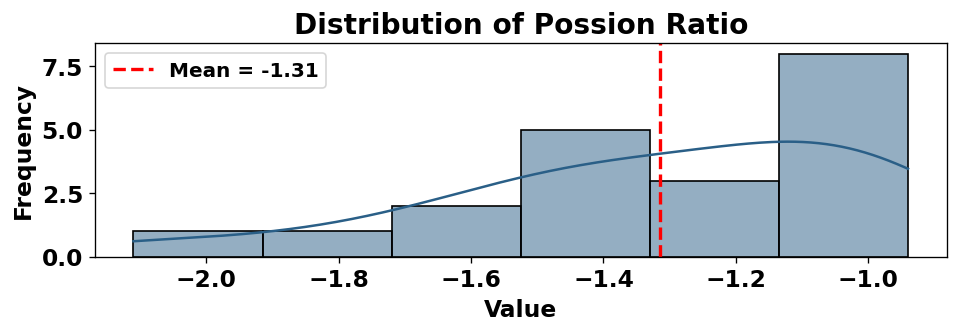

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置全局样式
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['font.size'] = 14

# 你的数据
data = [-1.67, -0.94, -1.84, -1.11, -1.37, -1.06, -1.18, -1.60, -1.27, -1.47, -0.98, -1.28, -1.01, -2.11, -1.05, -1.04, -1.46, -1, -1.35, -1.50]

# 创建画布
plt.figure(figsize=(8, 3), dpi=120)

# 使用 seaborn 绘图（直方图 + KDE）
sns.histplot(data, kde=True, color='#2A5F87', bins=6, edgecolor='black')

# 标注平均值
mean_val = np.mean(data)
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_val:.2f}')

# 图表设置
plt.title('Distribution of Possion Ratio')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# 显示图
plt.tight_layout()
plt.show()


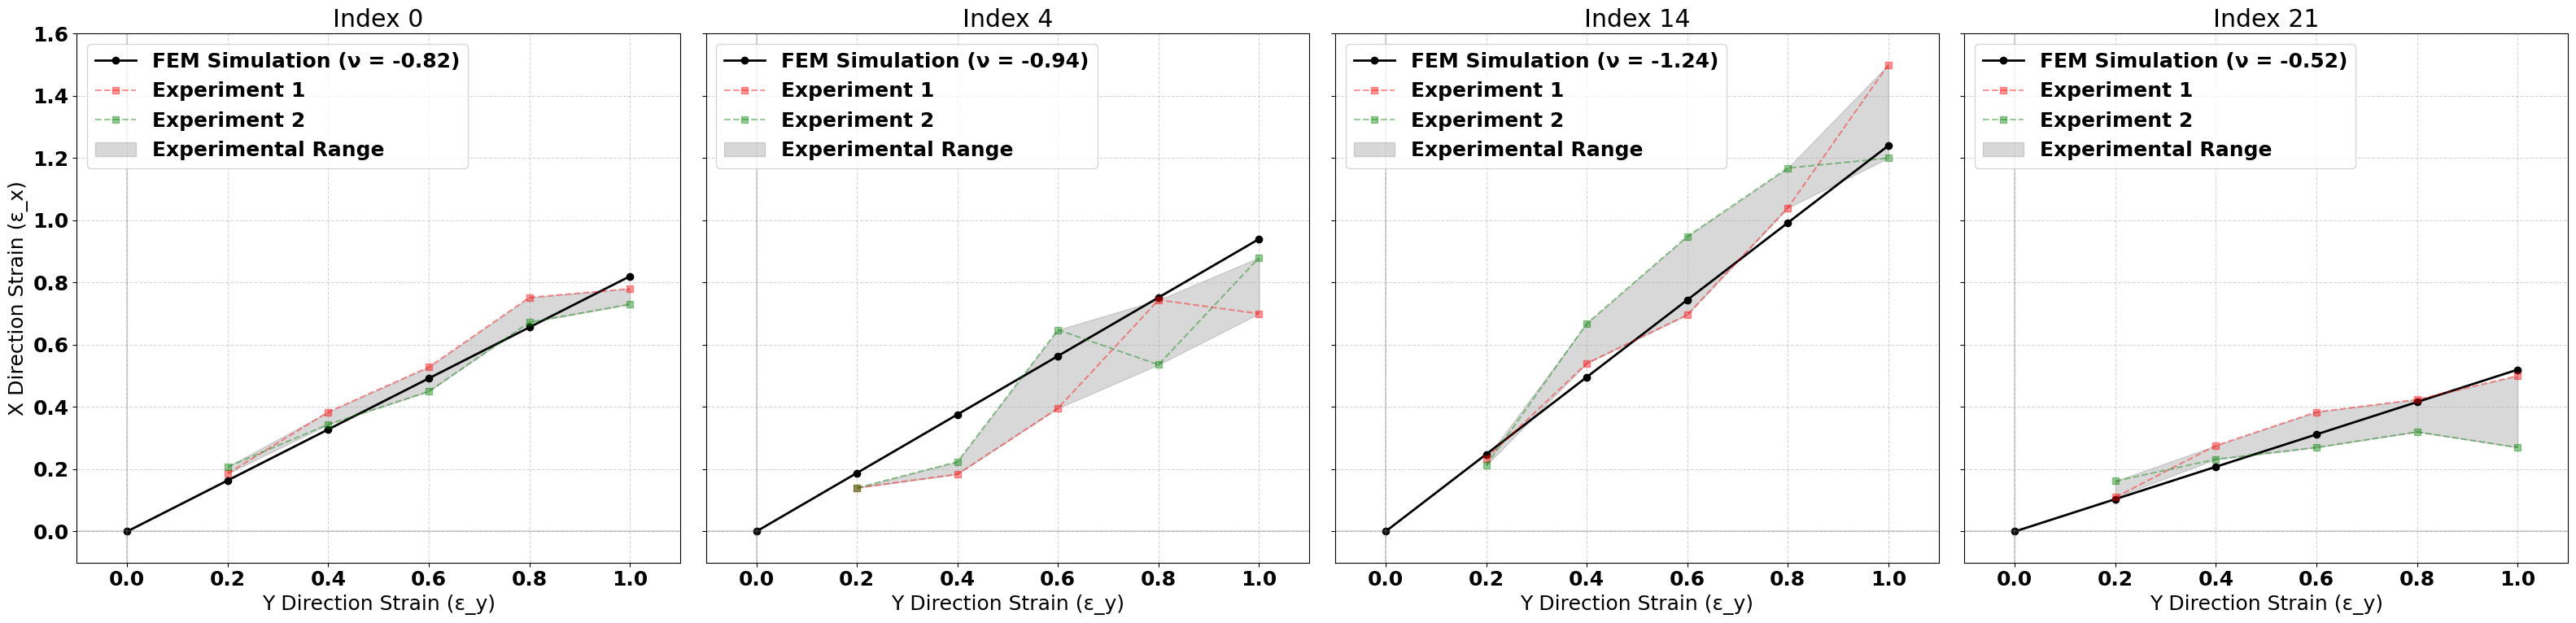

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 设置全局字体为 14 加粗
plt.rcParams.update({
    'font.size': 18,
    'font.weight': 'bold'
})

# 定义Y方向应变（所有案例共用）
y_strain_values = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0])
y_strain_exp = y_strain_values[1:]  # 实验对应的Y应变从0.2开始

# 数据准备（四个案例）
cases = [
    {
        'poisson_simulation': -0.82,
        'poisson_exp1': np.array([-0.93, -0.96, -0.88, -0.94, -0.78]),
        'poisson_exp2': np.array([-1.04, -0.86, -0.75, -0.84, -0.73]),
        'title': 'Index 0'
    },
    {
        'poisson_simulation': -0.94,
        'poisson_exp1': np.array([-0.70, -0.46, -0.66, -0.93, -0.70]),  # Based on index4
        'poisson_exp2': np.array([-0.70, -0.56, -1.08, -0.67, -0.88]),
        'title': 'Index 4'
    },
    {
        'poisson_simulation': -1.24,
        'poisson_exp1': np.array([-1.17, -1.35, -1.16, -1.30, -1.50]),  # Based on index14
        'poisson_exp2': np.array([-1.06, -1.67, -1.58, -1.46, -1.2]),
        'title': 'Index 14'
    },
    {
        'poisson_simulation': -0.52,
        'poisson_exp1': np.array([-0.55, -0.69, -0.64, -0.53, -0.50]),  # Based on index21
        'poisson_exp2': np.array([-0.81, -0.58, -0.45, -0.40, -0.27]),
        'title': 'Index 21'
    },
]

# 创建一行四列的子图
fig, axes = plt.subplots(1, 4, figsize=(32, 8), sharey=True)  # Adjusted to 4 columns

# 遍历每个案例并绘制
for i, case in enumerate(cases):
    ax = axes[i]
    
    # 计算仿真X方向应变值
    x_strain_simulation = -case['poisson_simulation'] * y_strain_values
    
    # 计算三组实验的X方向应变值
    x_strain_exp1 = -case['poisson_exp1'] * y_strain_exp
    x_strain_exp2 = -case['poisson_exp2'] * y_strain_exp

    
    # 计算实验结果的范围
    x_strain_min = np.minimum.reduce([x_strain_exp1, x_strain_exp2])
    x_strain_max = np.maximum.reduce([x_strain_exp1, x_strain_exp2])
    
    # 绘制仿真泊松比曲线
    ax.plot(y_strain_values, x_strain_simulation, 
            label=f"FEM Simulation (ν = {case['poisson_simulation']})", 
            color='black', 
            linestyle='-', 
            marker='o',
            linewidth=2)
    
    # 绘制三组实验数据
    ax.plot(y_strain_exp, x_strain_exp1, 
            label="Experiment 1", 
            color='red', 
            linestyle='--', 
            marker='s',
            linewidth=1.5,
            alpha=0.4)
    ax.plot(y_strain_exp, x_strain_exp2, 
            label="Experiment 2", 
            color='green', 
            linestyle='--', 
            marker='s',
            linewidth=1.5,
            alpha=0.4)

    
    # 添加灰色阴影表示实验结果范围
    ax.fill_between(y_strain_exp, x_strain_min, x_strain_max, 
                    color='gray', 
                    alpha=0.3, 
                    label='Experimental Range')
    
    # 添加标题和标签
    ax.set_title(case['title'])
    ax.set_xlabel('Y Direction Strain (ε_y)')
    if i == 0:  # 仅在第一个子图上显示Y轴标签
        ax.set_ylabel('X Direction Strain (ε_x)')
    
    # 添加零点参考线
    ax.axhline(0, color='gray', linestyle='-', alpha=0.3)
    ax.axvline(0, color='gray', linestyle='-', alpha=0.3)
    
    # 显示图例（左上角）
    ax.legend(loc='upper left')
    
    # 显示网格
    ax.grid(True, linestyle='--', alpha=0.5)
    
    # 设置坐标轴范围
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.5 + 0.1)

# 调整整体布局
plt.tight_layout()

# 显示图形
plt.show()

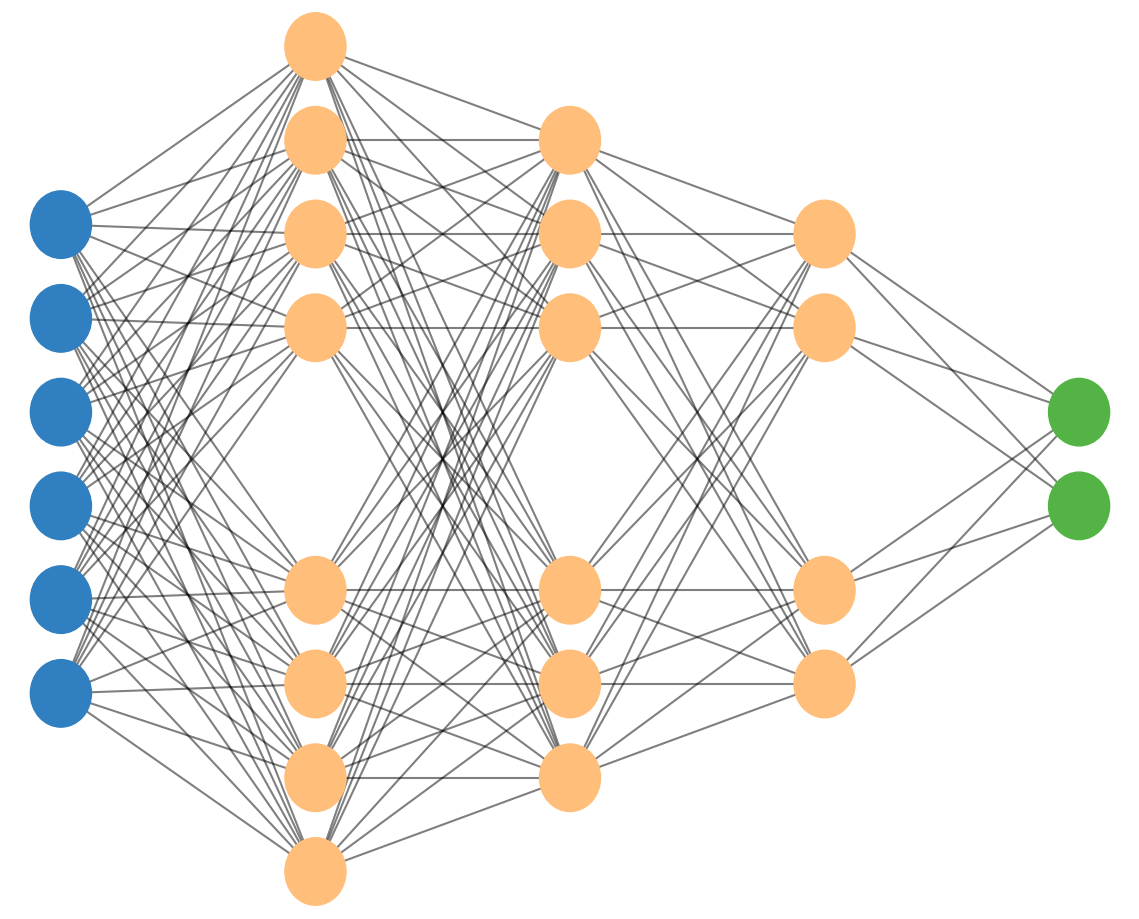

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def draw_neural_network(layers):
    fig, ax = plt.subplots(figsize=(14, 10))  # Adjusted figure size for a larger plot

    # Horizontal spacing between layers
    h_spacing = 2.0 / float(len(layers) - 1)

    # Vertical spacing factor for uniform node distribution
    y_spacing_factor = 1.5
    max_nodes = max(layers)
    y_spacing = y_spacing_factor / (max_nodes + 1)  # Calculate the vertical spacing

    # To store each layer's node positions
    node_positions = []

    # Nodes of the network
    for i, n in enumerate(layers):
        if i == 1 and n > 4:
            # Special spacing for 4th and 5th nodes in the second layer
            special_spacing = 0.3
            normal_spacing = (1.0 - special_spacing - (n - 1) * y_spacing) / 2

            layer_positions = []
            for j in range(n):
                if j < 3:
                    y_pos = normal_spacing + j * y_spacing
                elif j == 3:
                    y_pos = normal_spacing + j * y_spacing
                else:
                    y_pos = normal_spacing + j * y_spacing + special_spacing
                layer_positions.append(y_pos)

        elif i == 2 and n > 3:
            # Special spacing for 3rd and 4th nodes in the third layer
            special_spacing = 0.3
            normal_spacing = (1.0 - special_spacing - (n - 1) * y_spacing) / 2

            layer_positions = []
            for j in range(n):
                if j < 2:
                    y_pos = normal_spacing + j * y_spacing
                elif j == 2:
                    y_pos = normal_spacing + j * y_spacing
                else:
                    y_pos = normal_spacing + j * y_spacing + special_spacing
                layer_positions.append(y_pos)

        elif i == 3 and n > 2:
            # Special spacing for 2nd and 3rd nodes in the fourth layer
            special_spacing = 0.3
            normal_spacing = (1.0 - special_spacing - (n - 1) * y_spacing) / 2

            layer_positions = []
            for j in range(n):
                if j < 1:
                    y_pos = normal_spacing + j * y_spacing
                elif j == 1:
                    y_pos = normal_spacing + j * y_spacing
                else:
                    y_pos = normal_spacing + j * y_spacing + special_spacing
                layer_positions.append(y_pos)

        else:
            # Normal spacing for other layers
            if n > 1:
                total_height = (n - 1) * y_spacing
                y_offset = (1.0 - total_height) / 2
                layer_positions = [y_offset + j * y_spacing for j in range(n)]
            else:
                # Single node, center it vertically
                layer_positions = [0.5]

        # Store the node positions for this layer
        node_positions.append(layer_positions)

        # Draw the nodes (no border)
        for y_pos in layer_positions:
            if i == 0:
                # First layer color: RGB(47, 127, 193)
                color = (47/255, 127/255, 193/255)
            elif i == len(layers) - 1:
                # Last layer color: RGB(84, 179, 69)
                color = (84/255, 179/255, 69/255)
            else:
                # Layers 2, 3, 4 color: RGB(255, 190, 122)
                color = (255/255, 190/255, 122/255)

            circle = plt.Circle((i * h_spacing, y_pos), 0.06,
                                color=color,
                                zorder=4)  # No edge color
            ax.add_artist(circle)

    # Connect the nodes between layers
    for i, (n_a, n_b) in enumerate(zip(layers[:-1], layers[1:])): 
        for j in range(n_a):
            for k in range(n_b):
                y_start = node_positions[i][j]
                y_end = node_positions[i + 1][k]

                # Draw connection lines in black
                line = plt.Line2D([i * h_spacing, (i + 1) * h_spacing],
                                   [y_start, y_end], 
                                   c='k', alpha=0.5)  # 'k' stands for black
                ax.add_artist(line)

    # Set graph appearance
    ax.set_xticks([])  
    ax.set_yticks([])

    # Adjust y-axis to leave more space at the top and bottom
    plt.xlim(-0.1, (len(layers) - 1) * h_spacing + 0.1)
    plt.ylim(-0.3, 1.3)  # Increase the top/bottom margin to ensure full display

    # Hide axes
    plt.axis('off')

    # Adjust margins to ensure the entire figure is visible
    plt.subplots_adjust(left=0.1, right=0.9, top=0.95, bottom=0.05)

    # Save the figure as a high-resolution image
    plt.savefig('neural_network.png', dpi=300)  # Save with a high resolution (300 dpi)

    plt.show()

# Define the number of nodes per layer
layers = [6, 8, 6, 4, 2]  # Input layer (6), hidden layers (8, 6), output layer (1)

# Draw and save the neural network diagram
draw_neural_network(layers)


Index 0 计算斜率: 251.09 N/mm | 显示值: 251.1 N/mm
Index 1 计算斜率: 759.18 N/mm | 显示值: 759.2 N/mm
Index 4 计算斜率: 84.37 N/mm | 显示值: 102.2 N/mm
Index 5 计算斜率: 44.75 N/mm | 显示值: 160.5 N/mm


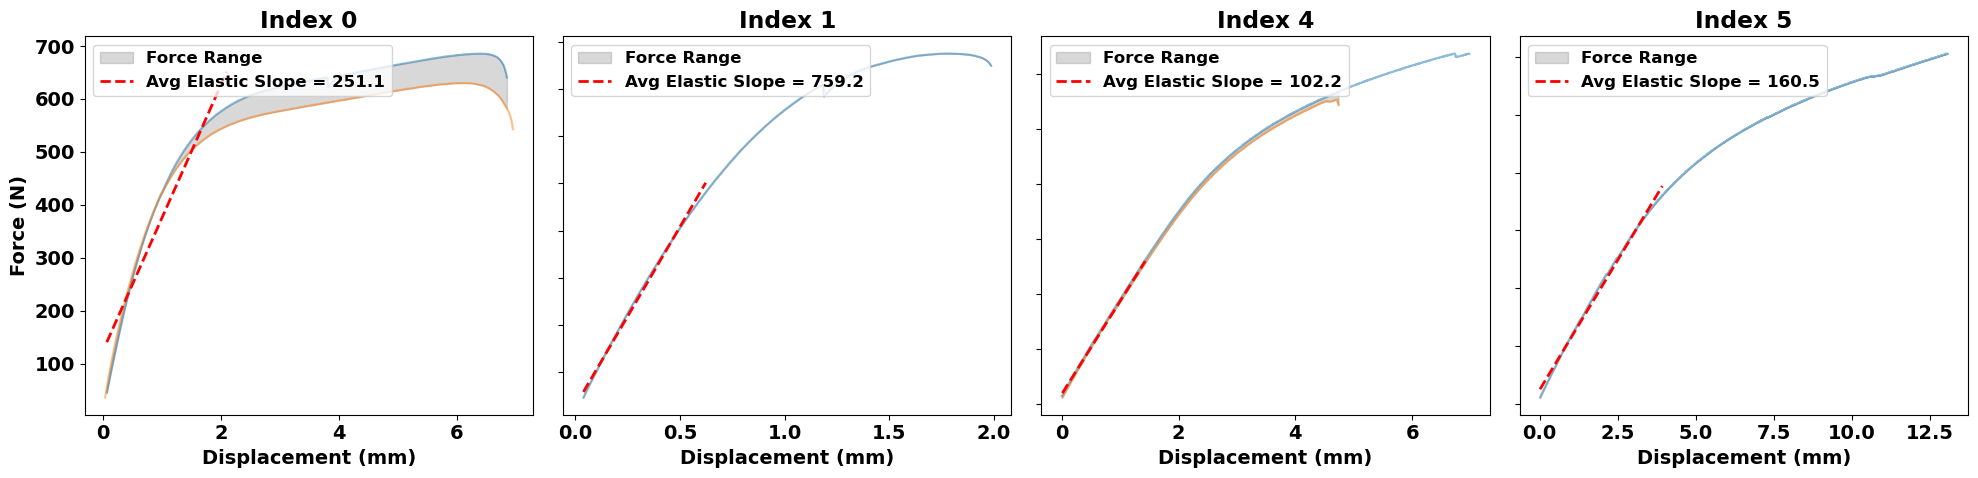

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 全局字体设置
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['legend.fontsize'] = 12

def process_and_plot_force_displacement(directory):
    index_data = {}
    
    for filename in os.listdir(directory):
        if filename.endswith('.txt') and filename.startswith('index_'):
            parts = filename.split('_')
            index = int(parts[1])
            
            filepath = os.path.join(directory, filename)
            data = np.loadtxt(filepath, encoding='utf-8-sig')
            force = data[:, 0]
            displacement = data[:, 1]
            
            if index not in index_data:
                index_data[index] = []
            index_data[index].append((force, displacement))
    
    indices = sorted(index_data.keys())
    num_indices = len(indices)
    
    fig, axs = plt.subplots(1, num_indices, figsize=(5 * num_indices, 5), squeeze=False)
    
    # 预定义的图例显示值（仅修改显示文本）
    legend_display_values = {4: 102.2, 5: 160.5}  # 仅修改这两个index的显示值
    
    for idx, index in enumerate(indices):
        ax = axs[0][idx]
        samples = index_data[index]

        all_displacements = []
        all_forces = []
        slopes = []
        intercepts = []

        for force, displacement in samples:
            ax.plot(displacement, force, alpha=0.5)
            all_displacements.append(displacement)
            all_forces.append(force)

            elastic_points = int(len(displacement) * 0.3)
            slope, intercept, _, _, _ = stats.linregress(
                displacement[:elastic_points], 
                force[:elastic_points]
            )
            slopes.append(slope)
            intercepts.append(intercept)

        min_disp = max([d[0] for d in all_displacements])
        max_disp = min([d[-1] for d in all_displacements])
        disp_range = np.linspace(min_disp, max_disp, 100)

        # 绘制灰色力范围阴影
        forces_at_disp = []
        for disp in disp_range:
            forces = []
            for d, f in zip(all_displacements, all_forces):
                idx_closest = np.argmin(np.abs(d - disp))
                forces.append(f[idx_closest])
            forces_at_disp.append((max(forces), min(forces)))

        max_forces = [f[0] for f in forces_at_disp]
        min_forces = [f[1] for f in forces_at_disp]
        ax.fill_between(disp_range, min_forces, max_forces, color='gray', alpha=0.3, label='Force Range')

        # 计算真实斜率（保持图形不变）
        avg_slope = np.mean(slopes)
        avg_intercept = np.mean(intercepts)
        elastic_fit_x = np.linspace(min_disp, min_disp + (max_disp - min_disp) * 0.3, 100)
        elastic_fit_y = avg_slope * elastic_fit_x + avg_intercept
        
        # 仅在图例中使用预定义值（如果存在）
        display_value = legend_display_values.get(index, avg_slope)
        ax.plot(elastic_fit_x, elastic_fit_y, 'r--', linewidth=2.0,
                label=f'Avg Elastic Slope = {display_value:.1f}')

        # 打印信息（显示原始计算值）
        print(f"Index {index} 计算斜率: {avg_slope:.2f} N/mm | 显示值: {display_value:.1f} N/mm")

        # 图表设置
        ax.set_title(f'Index {index}')
        ax.set_xlabel('Displacement (mm)')
        if idx == 0:
            ax.set_ylabel('Force (N)')
        else:
            ax.set_yticklabels([])
        ax.legend(loc='upper left')
        ax.grid(False)

    plt.tight_layout()
    plt.show()

# 使用示例
directory = r'E:\01_Graduate_projects\Cellular_structures\Multi-functional_design\exp\exps\archive424'
process_and_plot_force_displacement(directory)